In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from string import punctuation

import tensorflow as tf
keras = tf.keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from plot import plots

In [3]:
df = pd.read_csv("train.csv", encoding="latin")
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
def clean_data(tweet):
    tweet = tweet.lower()
    
    hashtag_pat = r"#[a-z0-9_\-]+"
    tweet = re.sub(pattern=hashtag_pat, repl="", string=tweet, flags=re.I)
    
    mention_pat = r"@[a-z0-9_\-]+"
    tweet = re.sub(pattern=mention_pat, repl="", string=tweet, flags=re.I)
    
    link_pat = r"http://[a-z0-9\-_\.]+ | https://[a-z0-9_\-\.]+ | www.[a-z0-9]+"
    tweet = re.sub(pattern=link_pat, repl="", string=tweet, flags=re.I)
    
    short_link_pat = r"bit.ly[a-z0-9\.]+"
    tweet = re.sub(pattern=short_link_pat, repl="", string=tweet, flags=re.I)
    
    number_pat = r="\d+"
    tweet = re.sub(pattern=number_pat, repl="", string=tweet, flags=re.I)
    
    tweet = " ".join(word.strip(punctuation) for word in tweet.split())
    return tweet

In [5]:
X = np.array(df.SentimentText.map(lambda x: clean_data(x)))
y = np.array(df.Sentiment)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [7]:
vocab_size = 1000
oov_token = "<OOV>"
max_len = 100
padding = "post"
trunc = "post"
embedding = 16

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

In [9]:
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding=padding, truncating=trunc)

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq)

X_train = np.array(X_train_pad)
X_test = np.array(X_test_pad)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(79991, 100) (79991,) (19998, 117) (19998,)


## Embedded model with Global Average Pooling

In [11]:
#model

keras.backend.clear_session()

model_embed_GAP = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding, input_shape=[max_len]),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(units=6, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

model_embed_GAP.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model_embed_GAP.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6178 - accuracy: 0.6488 - val_loss: 0.5477 - val_accuracy: 0.7325
Epoch 2/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5251 - accuracy: 0.7436 - val_loss: 0.5281 - val_accuracy: 0.7380
Epoch 3/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5125 - accuracy: 0.7528 - val_loss: 0.5219 - val_accuracy: 0.7520
Epoch 4/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5084 - accuracy: 0.7544 - val_loss: 0.5181 - val_accuracy: 0.7512
Epoch 5/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.5065 - accuracy: 0.7547 - val_loss: 0.5175 - val_accuracy: 0.7507
Epoch 6/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.5062 - accuracy: 0.7543 - val_loss: 0.5213 - val_accuracy: 0.7418
Epoch 7/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.5057 - accuracy: 0.7550 - val_loss: 0.5316 - val_accuracy:

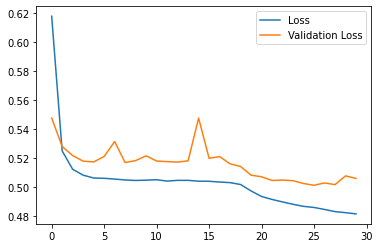

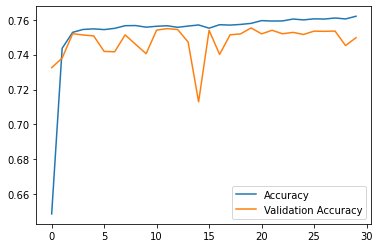

In [12]:
plots(model_embed_GAP)

## CNN

In [13]:
#CNN model

keras.backend.clear_session()

model_cnn = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding, input_shape=[max_len]),
    keras.layers.Conv1D(16, 5),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dense(units=6, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

model_cnn.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model_cnn.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5287 - accuracy: 0.7287 - val_loss: 0.5396 - val_accuracy: 0.7277
Epoch 2/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4828 - accuracy: 0.7650 - val_loss: 0.5462 - val_accuracy: 0.7284
Epoch 3/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4669 - accuracy: 0.7757 - val_loss: 0.5565 - val_accuracy: 0.7166
Epoch 4/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4525 - accuracy: 0.7847 - val_loss: 0.5688 - val_accuracy: 0.7088
Epoch 5/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4403 - accuracy: 0.7920 - val_loss: 0.5748 - val_accuracy: 0.7050
Epoch 6/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4294 - accuracy: 0.8004 - val_loss: 0.6024 - val_accuracy: 0.6848
Epoch 7/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4195 - accuracy: 0.8064 - val_loss: 0.6028 - val_ac

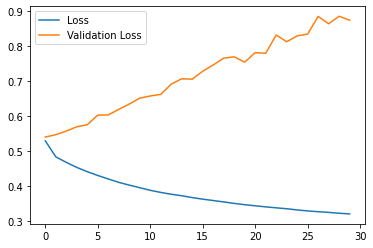

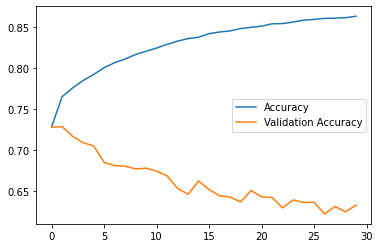

In [14]:
plots(model_cnn)

## Bidirectional LSTM

In [16]:
#lstm model

keras.backend.clear_session()

model_lstm = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding, input_shape=[max_len]),
    keras.layers.Bidirectional(keras.layers.LSTM(3)),
    keras.layers.Dense(units=1, activation = "sigmoid")
])

model_lstm.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

history = model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 [==============================] - 130s 52ms/step - loss: 0.5459 - accuracy: 0.7215 - val_loss: 0.7160 - val_accuracy: 0.5609
Epoch 2/10
2500/2500 [==============================] - 139s 56ms/step - loss: 0.5034 - accuracy: 0.7560 - val_loss: 0.7104 - val_accuracy: 0.5609
Epoch 3/10
2500/2500 [==============================] - 142s 57ms/step - loss: 0.4930 - accuracy: 0.7607 - val_loss: 0.7183 - val_accuracy: 0.5609
Epoch 4/10
2500/2500 [==============================] - 132s 53ms/step - loss: 0.4864 - accuracy: 0.7641 - val_loss: 0.7190 - val_accuracy: 0.5609
Epoch 5/10
2500/2500 [==============================] - 115s 46ms/step - loss: 0.4811 - accuracy: 0.7662 - val_loss: 0.7114 - val_accuracy: 0.5609
Epoch 6/10
2500/2500 [==============================] - 123s 49ms/step - loss: 0.4764 - accuracy: 0.7677 - val_loss: 0.7136 - val_accuracy: 0.5609
Epoch 7/10
2500/2500 [==============================] - 126s 50ms/step - loss: 0.4724 - accuracy: 0.7717 - val_loss: 0

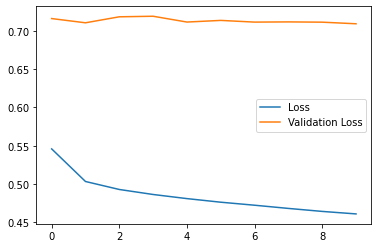

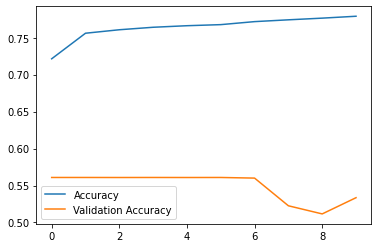

In [17]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()


In [18]:
#checking with fake reviews

fake_reviews = ["This is good", 
                "This is bad",
                "Can do better",
                "Not as nice as I thought",
                "I am Batman",
                "What do you think of ban?"]

In [19]:
def predict_review(model, review, padding="post", trunc="post", max_len=100):
    review_seq = tokenizer.texts_to_sequences(review)
    review_pad = pad_sequences(review_seq, maxlen=max_len, padding=padding, truncating=trunc)
    prediction = model.predict(review_pad)
    for i in range(len(review)):
        print(review[i], prediction[i])

In [20]:
model_name = [ "Embed with GPA", "CNN", "LSTM"]
models = [model_embed_GAP, model_cnn, model_lstm]

In [21]:
for m,n in zip(models, model_name):
    print(n)
    print(predict_review(m, fake_reviews), "\n")

Embed with GPA
This is good [0.86544234]
This is bad [0.17408018]
Can do better [0.8987358]
Not as nice as I thought [0.57718086]
I am Batman [0.63040733]
What do you think of ban? [0.8828463]
None 

CNN
This is good [0.9339545]
This is bad [0.1927837]
Can do better [0.9896846]
Not as nice as I thought [0.16037175]
I am Batman [0.54149264]
What do you think of ban? [0.8905554]
None 

LSTM
This is good [0.8906823]
This is bad [0.09768596]
Can do better [0.84716624]
Not as nice as I thought [0.53750813]
I am Batman [0.5833115]
What do you think of ban? [0.8354761]
None 



## Creating TSV for embedding projector using cnn model

In [22]:
word_dict = tokenizer.word_index

reverse_dict = {j:i for i,j in word_dict.items()}

weights = model_cnn.layers[0].get_weights()[0]

out_meta = open("meta_cnn.tsv", "w")
out_vectors = open("vect_cnn.tsv", "w")

for i in range(1,len(weights)):
    word = reverse_dict[i]
    embedding = weights[i]
    out_meta.write(word+"\n")
    out_vectors.write("\t".join([str(i) for i in embedding])+"\n")
out_meta.close()
out_vectors.close()

## Creating TSV for emdedding projector using LSTM

In [23]:
weights = model_lstm.layers[0].get_weights()[0]

out_meta = open("meta_lstm.tsv", "w")
out_vectors = open("vect_lstm.tsv", "w")

for i in range(1,len(weights)):
    word = reverse_dict[i]
    embedding = weights[i]
    out_meta.write(word+"\n")
    out_vectors.write("\t".join([str(i) for i in embedding])+"\n")
out_meta.close()
out_vectors.close()

## Creating TSV for embedding projector using Embedded model

In [24]:
weights = model_embed_GAP.layers[0].get_weights()[0]

out_meta = open("meta_GAP.tsv", "w")
out_vectors = open("vect_GAP.tsv", "w")

for i in range(1,len(weights)):
    word = reverse_dict[i]
    embedding = weights[i]
    out_meta.write(word+"\n")
    out_vectors.write("\t".join([str(i) for i in embedding])+"\n")
out_meta.close()
out_vectors.close()